## CSCD 439 Lab 1
### Evan Gordon


In [62]:
import pandas as pd
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.shape

(21613, 21)

In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

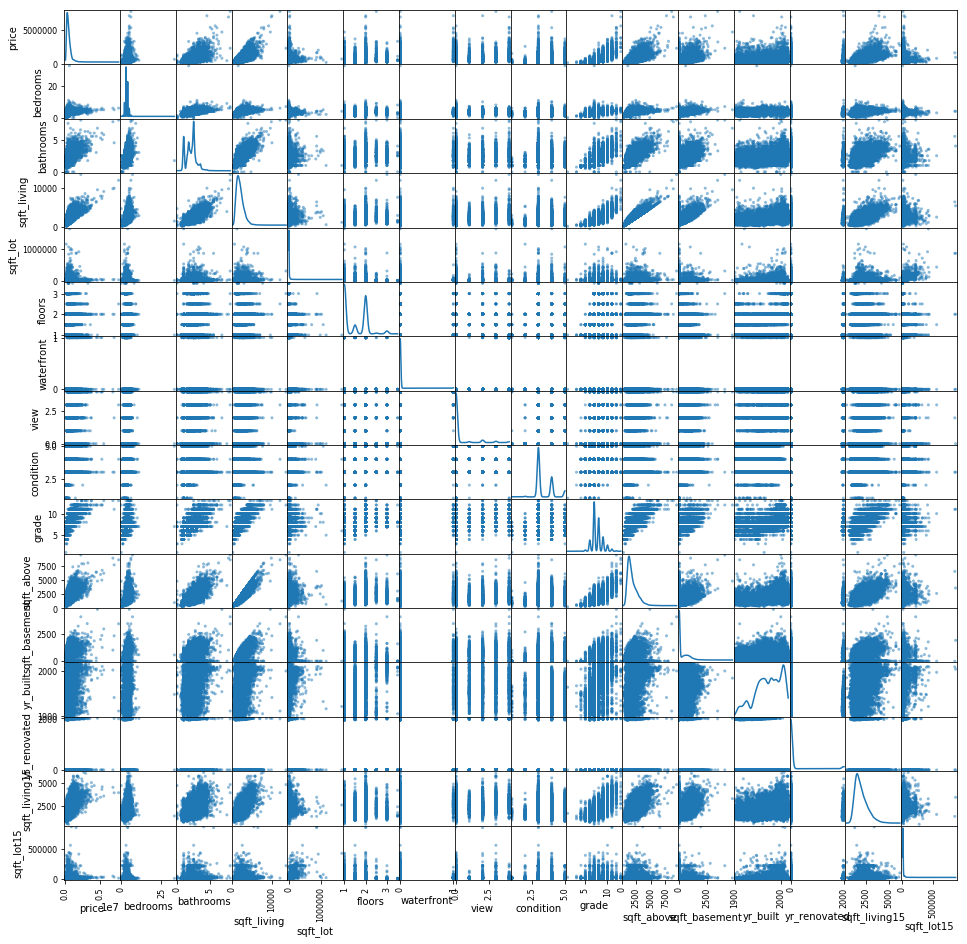

In [5]:
#plot data 
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# you can exclude some rows which may not fit in the regression.
testdf = df.drop(['id', 'date', 'zipcode', 'lat', 'long'], axis=1)
scatter_matrix(testdf, figsize=(16,16), diagonal='kde')
plt.show()

In [6]:
#check for null values
nulldf = df.isnull()
nulldf.sum(axis=0)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Questions

### Is there any data missing (Nan)? If so, how would you remove it?
As seen above, there is no missing data in any of the predictors. 

If there were missing data, and it was perhaps 1-2 missing entries where it would be easy to make up something I would consider keeping the columns in my model. However, if there were lots of missing entries in a given column I would consider scrapping that column entirely.

### What columns appear to offer the best hope of a linear approximation of price?
Number of Bathrooms, number of bedrooms, square feet for living area, grade, square feet above, square feet basement, square feet living all seem to corrolate increases in these values tend to increase the price with varying degrees of accuracy.

### Which columns data are categorical? Which are numerical?
I'm going to try to define the categorical data, the rest can be assumed that i believe are numerical.

##### Categorical:
    waterfront -
    view -
    grade, condition - i would argue that condition and grade are categorical, because these are groups formed in an attempt to lump houses into quality types.
    year - renovated could be a category, because not all houses will have been renovated.
    zip - code could be defined as categorical because it is lumping houses into general area groups.
    
id, date, lat and long are data types that we really arent concerned with in the model. A case could be made for date. ID is only useful for differentiating one house sale to another. Since there is only one entry for each house this really has no meaning as well.

### Which is the "best" column to use for prediction? This is a judgement call, but I'd like to know how you justify it.
Personally if I were looking for a house, I would put more value into living space, or square feet of the home. This doesn't mean that what i value is what everyone values. Now, obviously there are many variables that people take into account when buying a house. I do somewhat like the positive trend and compact cone that grade has when compared to price. However sqft_living does after all provide a more compact cone that trends in the right direction. 

I'd like to say that grade is the best indicator, but with the given data sqft_living seems to provide slightly more accurate data and therefore, I would subjectively declare that as the best overall column. This, however is all judgement calls and without going in and determinging the r^2 value for each attribute i can't say for sure what is that actual best value to use.


# of elements in test set: 4323
# of elements in training set 17290
Variance score:  0.475630344304


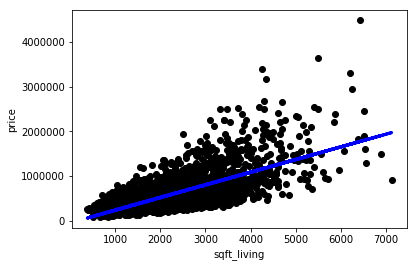

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

df = pd.read_csv('kc_house_data.csv')#load data

# make the predictor matrix and label vector
X = df[['sqft_living']].as_matrix()  # This will change to whatever column you are using
y = df[['price']].as_matrix()

lr = LinearRegression()# make the linear regression object
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)# split the data for validation
print("# of elements in test set:", len(X_test))
print("# of elements in training set", len(X_train))
lr.fit(X_train, y_train)#train model
lr.coef_,lr.intercept_

test_predicted = lr.predict(X_test)#predict outcome
print("Variance score: ", metrics.r2_score(y_test, test_predicted))#check statistics


plt.scatter( X_test, y_test, color='black')
plt.plot(X_test, test_predicted, color='blue', linewidth=3)

plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

## Results of Run
At lower housing prices the predicter is very good, however there is a larger and larger error as the price of the house increases.

Since I was also curious about grade, I'm also going to try running a test for that as well.

Variance score:  0.459526570208


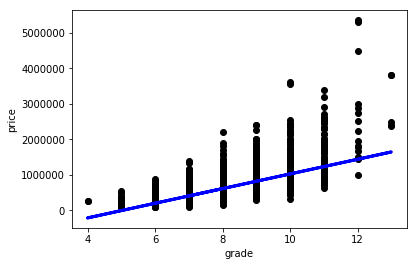

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

df = pd.read_csv('kc_house_data.csv')#load data

# make the predictor matrix and label vector
X = df[['grade']].as_matrix()  # This will change to whatever column you are using
y = df[['price']].as_matrix()

lr = LinearRegression()# make the linear regression object
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)# split the data for validation
lr.fit(X_train, y_train)#train model
lr.coef_,lr.intercept_

test_predicted = lr.predict(X_test)#predict outcome
print("Variance score: ", metrics.r2_score(y_test, test_predicted))#check statistics


plt.scatter( X_test, y_test, color='black')
plt.plot(X_test, test_predicted, color='blue', linewidth=3)

plt.xlabel('grade')
plt.ylabel('price')
plt.show()

## Result of Run
Again the results are pretty tightly coupled to the line. However, not only is the variance score for this test lower; the line is visibly lower than the average price at a given point. For quite a few grades (from 0 to about 5) the prediction actually outputs negative prices. Thus it seems like grade creates an inferior model for predicting house prices.

## Questions

### How might you choose which column is best for the predictive model?
This might tend to vary from case to case, but generally speaking I would try to look for lots of data, and data that seems to corrolate with the anticipated output. Using the r^2 value of a given column you can find out which data sets map better to the given model with relative ease.

### Can you compare the quality of the different columns as predictors before you train a model? How?
One thing I noticed after running my tests was that if I compared grade to sqft_living; grade has a smaller variance in outcomes. I thought grade might be a good indicater of price because whoever determines the grade of a house might take many aspects of value for a house into account. However, setting that aside, becuase there was a smaller variance in data points for grade, I would say it is less qualified to be a good indicator for the model.

### How many rows are in the training data? How many rows in the test data?
There are 4323 elements in the test data set, and there are 17290 elements in the training data set.

### What do the metric scores tell you about the model?
The r2 score is viewed as being objectively better the closer it is to 1. Looking back at the test data, neither of my tests were very good, however the sqft_living test run had a better score and would be a better predictor for price than the other predictors.


Value of coefficients:  [[ -6.32509972e+04   6.60193206e+04   1.68367365e+02  -4.90258928e-02
    5.90666133e+04   7.68979358e+01   9.14694290e+01  -3.50182264e+03
    2.46756995e+01   9.80303304e+01  -6.56437538e-01]]
Value of intercept:  [ 6725971.36501314]
Variance Score:  0.553139953674


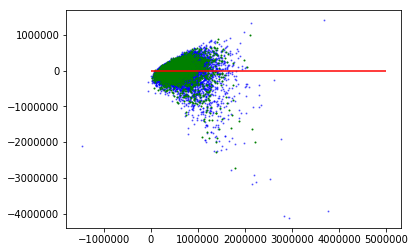

In [3]:
df = df.drop(['id', 'date', 'zipcode', 'waterfront', 'view', 'condition', 'grade', 'lat', 'long'], axis=1)

# Get X matrix and y vector.
X = df.drop(['price'], axis=1).as_matrix()
y = df[['price']].as_matrix()

# Train/test split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 30)

# Train the regression model 
lr = LinearRegression()
lr.fit(X_train, y_train)

# Generate predictions for analysis
train_predicted = lr.predict(X_train)
test_predicted = lr.predict(X_test)

# plot residuals against predictions
import matplotlib.pyplot as plt
print("Value of coefficients: ", lr.coef_)
print("Value of intercept: ", lr.intercept_)
plt.scatter(train_predicted , train_predicted - y_train, color = 'b', s=1, alpha=0.5)
test_predicted = lr.predict(X_test)

r_score = metrics.r2_score(y_test, test_predicted)
print("Variance Score: ", r_score)

plt.scatter(test_predicted , test_predicted - y_test, color = 'g', s=1)
plt.hlines(y=0, xmin=0, xmax = 5000000, color='r')
plt.show()

## Questions

### What are the values of the coefficients learned by the model? what is the intercept?
Coefficients: [[ -6.19696263e+04   6.45993880e+04   1.67130814e+02   1.05332100e-02
    5.95764471e+04   7.97557278e+01   8.73750863e+01  -3.43651856e+03
    2.45837694e+01   9.22537501e+01  -6.61821492e-01]]
    
Intercept: [ 6652089.87252081]
    

### How can I evaluate the quality of multivariate models since I can't plot them and look at them? Why can't I plot them directly?
Plotting grhapical representations of data beyond 4 dimensions is more or less impossible to create a readable model. You can test the trained model against a lot of sample data and check how accurate the predictions are. You can also use the r^2 value for a model to get a simple rating for your model.

### How does variance affect the model's ability to predict prices?
The more variance in the data set the less accurately the model is able to predict a house price. This is especially true in the case of outlier data, such data points can drastically alter the output for a given model.

### What visual tools do I have to check for likely helpful predictors? Which metrics can help?
Graphic representations are always helpful. However not always useful as previously discussed with models of higher dimensions. The r^2 value for a given attribute can be very helpful to determin good from inferior predictors as well.

### Think about how you might use zip code to make a better model. How can we organize the 70 zip codes to provide insight into price diferentiation without adding 69 dimensions to the model?
Zip codes be bunched together into similar priced tiers, so say that two neiboring zip codes tend to have similarly priced houses, those coudl be grouped into on dimension. This might create a lot of extra effort in curating the input data, but it could lead to a more accurate model. 

### Finding the average value for different predictors by zip code
In order to find the best predictors by zip code we will average each predictors by zip code and look for trends that could help create useful predictors

In [126]:
import pandas as pd
import math
df = pd.read_csv('kc_house_data.csv')
dfbyzip = df[['zipcode', 'price', 'grade', 'sqft_living', 'yr_built']].groupby('zipcode').mean() \
    .agg({ 'price': int, 'grade':int, 'sqft_living':int, 'yr_built':int})
dfbyzip.head()

,grade,sqft_living,yr_built,price
zipcode,,,,
98001,7,1900,1980,280804
98002,6,1627,1967,234284
98003,7,1928,1976,294111
98004,8,2909,1971,1355927
98005,8,2656,1969,810164


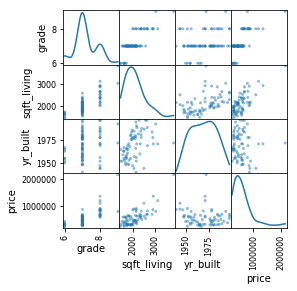

In [127]:

import matplotlib.pyplot as plt
scatter_matrix(dfbyzip, figsize=(4,4), diagonal='kde')
plt.show()

### Results
I really like the look of the corrolation between sqft_living and price when grouped by zip code. yr_built doesnt have any strong corroolations. Grade does have a bit of a corrolation, but as we discovered earlier it doesnt work as well as an indicator as sqft_living does. 

### Next Steps
We'll now try to train a linear regression for price prediction with sqft_living grouped by zipcode.

# of elements in test set: 14
# of elements in training set 56
Variance score:  0.654172550068


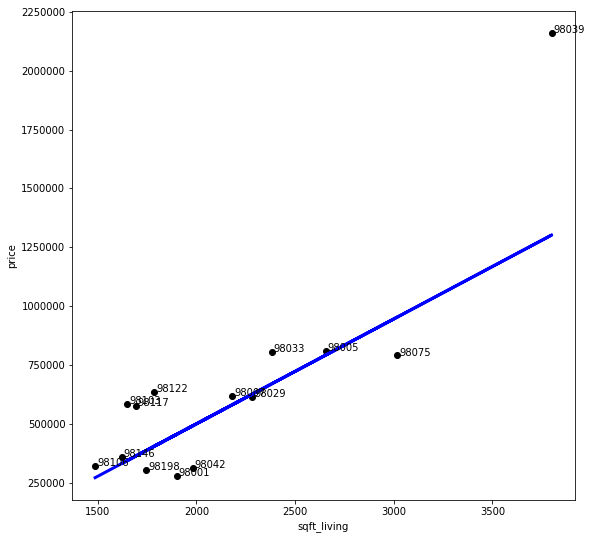

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import math
import matplotlib.pyplot as plt
df = pd.read_csv('kc_house_data.csv')
dfbyzip = df[['zipcode', 'price', 'grade', 'sqft_living', 'yr_built']].groupby('zipcode').mean() \
    .agg({ 'price': int, 'grade':int, 'sqft_living':int, 'yr_built':int})
dfbyzip
#new_df = df.DataFrame()
#df.get_dummies()
#then add this table into old data using this new talbe as a lookup table
#use apply function (dataframe func) can be used to apply series to dataframe
X = dfbyzip[['sqft_living']].as_matrix()  # This will change to whatever column you are using
y = dfbyzip[['price']].as_matrix()

lr = LinearRegression()# make the linear regression object
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 40)# split the data for validation
print("# of elements in test set:", len(X_test))
print("# of elements in training set", len(X_train))
lr.fit(X_train, y_train)#train model
lr.coef_,lr.intercept_

test_predicted = lr.predict(X_test)#predict outcome
print("Variance score: ", metrics.r2_score(y_test, test_predicted))#check statistics

plt.scatter( X_test, y_test, color='black')

for name,group in dfbyzip.iterrows():
    if group['sqft_living'] in X_test and group['price'] in y_test:
        plt.annotate(str(name), (group['sqft_living'] + 10, group['price'] + 10))

        
plt.plot(X_test, test_predicted, color='blue', linewidth=3)

plt.rcParams["figure.figsize"] = [9,9]
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

### Result

What I was most interested in this run would be zipcodes that have similar prices to each other. Ideally I wanted to find would have been some zip codes that are geographically located next to each other and also had similar average prices. As far as I can tell i did not find this

A problem that did appear at this stage was that because there are only 70 zip codes in the data set, the results of the training would drastically vary based on what zip codes were used during the training. When adjusting the seed for this model some runs would end up with r^2 values that were incredibly high, while others were so abysmal that one could almost make the mistake in saying that this was a bad model.

To remedy the small data set I'm going to try and create a new column of data that assigns a price range to a zip code. I'll try 3 groups for now and possibly in the future adjust this. The groups for now will be divided in to Low (L), Medium (M) and High (H).


In [14]:
def bracket (row):
    if row['price'] > 900000:
        return 'H'
    if row['price'] > 500000:
        return 'M'
    return 'L'

dfbyzip['price_bracket'] = dfbyzip.apply(lambda row: bracket (row), axis=1)
dfbyzip.head()

,sqft_living,yr_built,price,grade,price_bracket
zipcode,,,,,
98001,1900,1980,280804,7,L
98002,1627,1967,234284,6,L
98003,1928,1976,294111,7,L
98004,2909,1971,1355927,8,H
98005,2656,1969,810164,8,M


In [15]:
df_bracket = pd.get_dummies(dfbyzip['price_bracket'])#create dummies
df_bracket.insert(3, 'zipcode', 0)
for i,group in df_bracket.iterrows():
    df_bracket.set_value(i, 'zipcode', int(i))

df_new = df.set_index('zipcode').join(df_bracket.set_index('zipcode'))#join tables on zipcode

Value of coefficients:  [[  2.35653468e+02   5.84074941e-02   3.55909996e+05  -2.88750098e+05
   -6.71598977e+04]]
Value of intercept:  [ 206962.87494817]
Variance Score:  0.666890927138


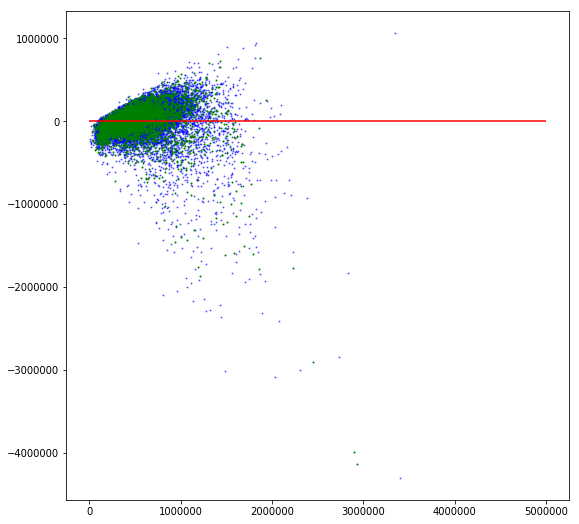

In [16]:
training_df = df_new.drop(['id', 'date', 'waterfront', 'view', 'condition', 'grade', 'lat', 'long', 'floors', 'bedrooms', 
                          'bathrooms', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'sqft_above', 'sqft_basement', 'yr_built'], axis=1)
#list(training_df)

# Get X matrix and y vector.
X = training_df.drop(['price'], axis=1).as_matrix()
y = training_df[['price']].as_matrix()

# Train/test split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 40)

# Train the regression model 
lr = LinearRegression()
lr.fit(X_train, y_train)

# Generate predictions for analysis
train_predicted = lr.predict(X_train)
test_predicted = lr.predict(X_test)

# plot residuals against predictions
import matplotlib.pyplot as plt
print("Value of coefficients: ", lr.coef_)
print("Value of intercept: ", lr.intercept_)
plt.scatter(train_predicted , train_predicted - y_train, color = 'b', s=1, alpha=0.5)
test_predicted = lr.predict(X_test)

r_score = metrics.r2_score(y_test, test_predicted)
print("Variance Score: ", r_score)
plt.scatter(test_predicted , test_predicted - y_test, color = 'g', s=1)
plt.hlines(y=0, xmin=0, xmax = 5000000, color='r')
plt.show()

### Result

In this regression I took out some of the predictors that I deemed less useful to the outcome. I then added in the data columns that I generated previously. As I mentioned, I divided price ranges into a Low, Med, and High division. I then took the average price of a house by zip code and assigned that zip code one of the three brackets. These brackets I then applied in the run of this model. The results moved in a positive direction. During my initial multivariate regression I ended up with a r^2 score of 0.5531. In contrast, this run ended with a value of 0.6669. This increase was good, but I was hoping for a slightly higher score. To follow this up I want to try a few more variations on the test. To this end I am also going to create a function that can be used to reduce code copying between runs.

['price', 'sqft_living', 'H', 'L', 'M']
Value of coefficients:  [[  2.36176728e+02   3.55450220e+05  -2.88302057e+05  -6.71481635e+04]]
Value of intercept:  [ 206547.19739851]
Variance Score:  0.666709852271


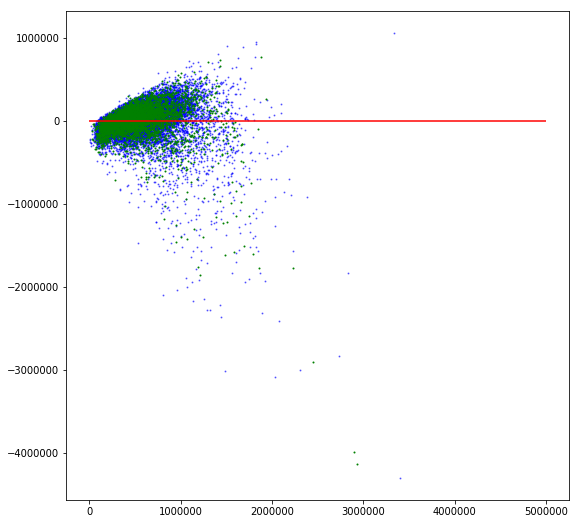

In [18]:
def multi_reg(training_df):
    # Get X matrix and y vector.
    X = training_df.drop(['price'], axis=1).as_matrix()
    y = training_df[['price']].as_matrix()

    # Train/test split
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 40)

    # Train the regression model 
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # Generate predictions for analysis
    train_predicted = lr.predict(X_train)
    test_predicted = lr.predict(X_test)

    # plot residuals against predictions
    import matplotlib.pyplot as plt
    print("Value of coefficients: ", lr.coef_)
    print("Value of intercept: ", lr.intercept_)
    plt.scatter(train_predicted , train_predicted - y_train, color = 'b', s=1, alpha=0.5)
    test_predicted = lr.predict(X_test)

    r_score = metrics.r2_score(y_test, test_predicted)
    print("Variance Score: ", r_score)
    plt.scatter(test_predicted , test_predicted - y_test, color = 'g', s=1)
    plt.hlines(y=0, xmin=0, xmax = 5000000, color='r')
    plt.show()

t_df = df_new.drop(['id', 'date', 'waterfront', 'view', 'condition', 'grade', 'lat', 'long', 'floors', 'bedrooms', 
                          'bathrooms', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'sqft_above', 'sqft_basement',
                    'yr_built', "sqft_lot"], axis=1)
print(list(t_df))
multi_reg(t_df)

['price', 'sqft_living', 'sqft_lot', 'yr_built', 'H', 'L', 'M']
Value of coefficients:  [[  2.53035895e+02   3.81708980e-02  -1.52454862e+03   3.37629164e+05
   -2.74877237e+05  -6.27519278e+04]]
Value of intercept:  [ 3167973.6093516]
Variance Score:  0.675404654674


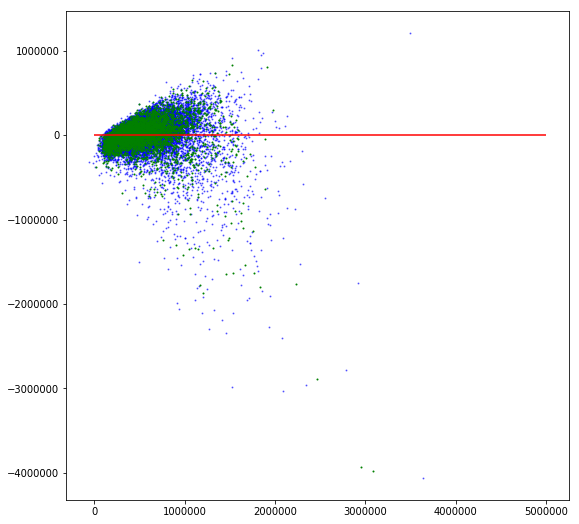

In [19]:
t_df = df_new.drop(['id', 'date', 'waterfront', 'view', 'condition', 'grade', 'lat', 'long', 'floors', 'bedrooms', 
                          'bathrooms', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'sqft_above', 'sqft_basement'], axis=1)
print(list(t_df))
multi_reg(t_df)

### Result

It seems like the best run I got happened when I actually added yr_built, and sqft_lot back into the equation. I found this quite interesting since that predictor wasn't really on my radar at all. The H, M, L predictor seemed to really increase the score I got in the end.

### Theories to look into for further study:

How could I better distribute the zip code price groups to come up with better predictors? (More groups? Different bracket ranges?)

Could some of the other predictors such as number of bathrooms affect the outcome for the better?

Are there any other variables not taken into account here that could increase the effectiveness of future models?